# Lab 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_images = np.loadtxt('train_images.txt')
train_labels = np.loadtxt('train_labels.txt').astype(np.int64)

test_images = np.loadtxt('test_images.txt')
test_labels = np.loadtxt('test_labels.txt').astype(np.int64)

## Ex1 & 2

In [27]:
class KnnClassifier:

    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def distance_l1(self, x, y):
        return np.sum(np.abs(x - y), axis=1)
    
    def distance_l2(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=1))

    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric.lower() == 'l1':
            distances = self.distance_l1(self.train_images, test_image)
        elif metric.lower() == 'l2':
            distances = self.distance_l2(self.train_images, test_image)
        else:
            raise Exception("Invalid metric. Must be 'l1' or 'l2'")

        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_neighbors]
    
        return np.bincount(nearest_labels).argmax()

## Ex3

In [29]:
class KnnClassifier:

    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def distance_l1(self, x, y):
        return np.sum(np.abs(x - y), axis=1)
    
    def distance_l2(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=1))

    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric.lower() == 'l1':
            distances = self.distance_l1(self.train_images, test_image)
        elif metric.lower() == 'l2':
            distances = self.distance_l2(self.train_images, test_image)
        else:
            raise Exception("Invalid metric. Must be 'l1' or 'l2'")

        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_neighbors]
    
        return np.bincount(nearest_labels).argmax()
        
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        return np.array([self.classify_image(img, num_neighbors, metric) for img in test_images])

    def accuracy_score(self, predicted_labels, test_labels):
        return np.mean(predicted_labels == test_labels)
    

knn = KnnClassifier(train_images, train_labels)

predicted_labels = knn.classify_images(test_images)
np.savetxt("predictii_3nn_l2_mnist.txt", predicted_labels)
    
accuracy = knn.accuracy_score(predicted_labels, test_labels)
print(f"Accuracy {accuracy * 100:.1f}%")

Accuracy 89.8%


## Ex4, a)

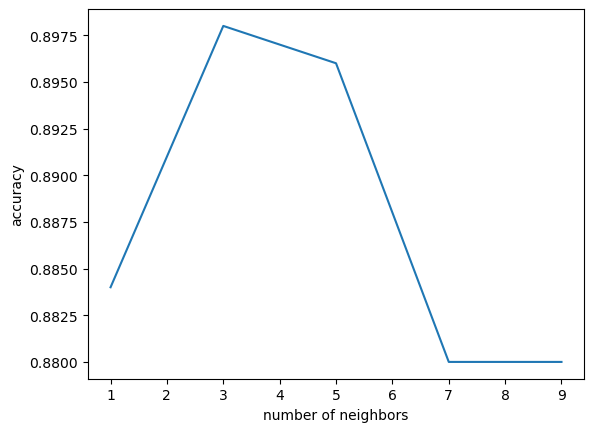

In [37]:
class KnnClassifier:

    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def distance_l1(self, x, y):
        return np.sum(np.abs(x - y), axis=1)
    
    def distance_l2(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=1))

    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric.lower() == 'l1':
            distances = self.distance_l1(self.train_images, test_image)
        elif metric.lower() == 'l2':
            distances = self.distance_l2(self.train_images, test_image)
        else:
            raise Exception("Invalid metric. Must be 'l1' or 'l2'")

        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_neighbors]
    
        return np.bincount(nearest_labels).argmax()
    
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        return np.array([self.classify_image(img, num_neighbors, metric) for img in test_images])

    def accuracy_score(self, predicted_labels, test_labels):
        return np.mean(predicted_labels == test_labels)
    

knn = KnnClassifier(train_images, train_labels)

x = np.array([1, 3, 5, 7, 9])
y = []

for num_neighbors in x:
    predicted_labels = knn.classify_images(test_images, num_neighbors)
    accuracy = knn.accuracy_score(predicted_labels, test_labels)
    y.append(accuracy)

f = open("acuratete_l2.txt", "w")
f.write(",".join([str(a) for a in y]))
f.close()

y = np.array(y)
plt.plot(x, y)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()

## Ex4, b) 

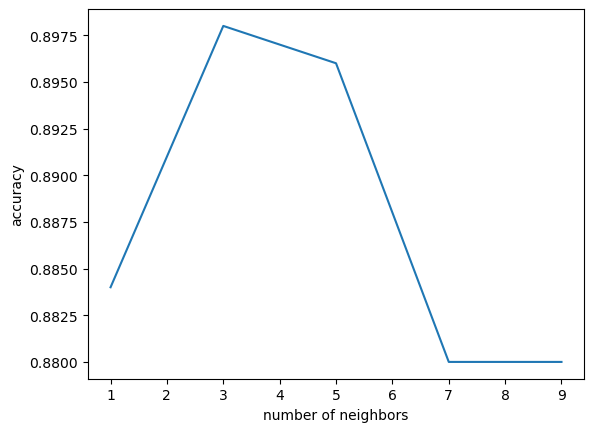

In [22]:
class KnnClassifier:

    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def distance_l1(self, x, y):
        return np.sum(np.abs(x - y), axis=1)
    
    def distance_l2(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=1))

    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric.lower() == 'l1':
            distances = self.distance_l1(self.train_images, test_image)
        elif metric.lower() == 'l2':
            distances = self.distance_l2(self.train_images, test_image)
        else:
            raise Exception("Invalid metric. Must be 'l1' or 'l2'")

        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_neighbors]
    
        return np.bincount(nearest_labels).argmax()
    
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        return np.array([self.classify_image(img, num_neighbors, metric) for img in test_images])

    def accuracy_score(self, predicted_labels, test_labels):
        return np.mean(predicted_labels == test_labels)
    

knn = KnnClassifier(train_images, train_labels)

x = np.array([1, 3, 5, 7, 9])
y = []

for num_neighbors in x:
    predicted_labels = knn.classify_images(test_images, num_neighbors, 'l1')
    accuracy = knn.accuracy_score(predicted_labels, test_labels)
    y.append(accuracy)

f = open("acuratete_l2.txt", "w")
f.write(",".join([str(a) for a in y]))
f.close()

y = np.array(y)
plt.plot(x, y)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()